## Setup

In [1]:
api_key = 'JplGKdspl9GzL9pESRWHkSwCx7P4xtZA5nOF8l2NN4rcw3TRFqzUHB4aZR59m9uX'
api_secret = 'JM7rLJZlIIm1NjzQFwk3KVsTs69cIbDSNf2xfGWe2Yfdsp0Y0A7dhYjMNmLzg27G'

In [2]:
!pip install python-binance mplfinance

     ---------------------------------------- 65.2/65.2 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 70.9/70.9 kB ? eta 0:00:00
     -------------------------------------- 288.9/288.9 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 556.0/556.0 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 122.2/122.2 kB 7.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

## Authenticate

In [4]:
client = Client(api_key, api_secret)

## Get Tickers

In [6]:
tickers = client.get_all_tickers()
tickers[:10]

[{'symbol': 'ETHBTC', 'price': '0.05767300'},
 {'symbol': 'LTCBTC', 'price': '0.00276200'},
 {'symbol': 'BNBBTC', 'price': '0.01111000'},
 {'symbol': 'NEOBTC', 'price': '0.00045400'},
 {'symbol': 'QTUMETH', 'price': '0.00251900'},
 {'symbol': 'EOSETH', 'price': '0.00081300'},
 {'symbol': 'SNTETH', 'price': '0.00002435'},
 {'symbol': 'BNTETH', 'price': '0.00043700'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00013600'}]

In [7]:
tickers[0]

{'symbol': 'ETHBTC', 'price': '0.05767300'}

In [9]:
ticker_df = pd.DataFrame(tickers)
ticker_df.head()

,symbol,price
0,ETHBTC,0.05767300
1,LTCBTC,0.00276200
2,BNBBTC,0.01111000
3,NEOBTC,0.00045400
4,QTUMETH,0.00251900


In [10]:
ticker_df.set_index('symbol', inplace = True)
ticker_df.head()

,price
symbol,
ETHBTC,0.05767300
LTCBTC,0.00276200
BNBBTC,0.01111000
NEOBTC,0.00045400
QTUMETH,0.00251900


In [13]:
float(ticker_df.loc['BTCUSDT']['price'])

21396.43

## Get Depth

In [15]:
depth = client.get_order_book(symbol='ETHBTC')
depth

{'lastUpdateId': 5473041394,
 'bids': [['0.05775400', '16.05130000'],
  ['0.05775100', '0.20160000'],
  ['0.05775000', '2.25040000'],
  ['0.05774900', '1.14150000'],
  ['0.05774600', '0.40490000'],
  ['0.05774400', '0.85910000'],
  ['0.05774000', '4.06060000'],
  ['0.05773800', '3.52890000'],
  ['0.05773700', '7.99980000'],
  ['0.05773600', '12.00000000'],
  ['0.05773500', '7.99810000'],
  ['0.05773400', '0.02920000'],
  ['0.05773200', '0.86580000'],
  ['0.05773100', '0.44440000'],
  ['0.05772400', '0.04500000'],
  ['0.05772200', '2.99110000'],
  ['0.05772100', '3.99600000'],
  ['0.05772000', '0.25000000'],
  ['0.05771900', '4.27890000'],
  ['0.05771700', '11.13940000'],
  ['0.05771600', '35.54670000'],
  ['0.05771300', '4.19210000'],
  ['0.05771200', '1.79410000'],
  ['0.05771000', '0.09190000'],
  ['0.05770800', '1.21580000'],
  ['0.05770700', '0.07000000'],
  ['0.05770600', '0.98240000'],
  ['0.05770500', '0.02930000'],
  ['0.05770400', '1.03960000'],
  ['0.05770300', '25.88210000']

In [19]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,0.05775500,16.59860000
1,0.05775900,4.07430000
2,0.05776200,1.09950000
3,0.05776900,0.46730000
4,0.05777000,1.08770000


## Historical Data

In [ ]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [24]:
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2019')
historical[1]

[1546387200000,
 '0.03661100',
 '0.04005000',
 '0.03650100',
 '0.03940400',
 '347117.74400000',
 1546473599999,
 '13457.53643352',
 216113,
 '176108.80500000',
 '6825.89509080',
 '0']

In [25]:
hist_df = pd.DataFrame(historical)
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1546300800000,0.03553400,0.03753200,0.03531500,0.03662900,168390.91000000,1546387199999,6118.53696104,128903,92258.48200000,3352.45235579,0
1,1546387200000,0.03661100,0.04005000,0.03650100,0.03940400,347117.74400000,1546473599999,13457.53643352,216113,176108.80500000,6825.89509080,0
2,1546473600000,0.03941500,0.03994900,0.03815600,0.03884600,284859.38900000,1546559999999,11112.70945150,187567,146215.67500000,5705.87689129,0
3,1546560000000,0.03885400,0.04085000,0.03855100,0.04009300,304951.98000000,1546646399999,12152.20499011,214027,157908.17800000,6294.03990061,0
4,1546646400000,0.04010000,0.04175200,0.04009600,0.04053300,312691.91000000,1546732799999,12797.16576898,222634,163755.76500000,6703.07615070,0


In [26]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1546300800000,0.03553400,0.03753200,0.03531500,0.03662900,168390.91000000,1546387199999,6118.53696104,128903,92258.48200000,3352.45235579,0
1,1546387200000,0.03661100,0.04005000,0.03650100,0.03940400,347117.74400000,1546473599999,13457.53643352,216113,176108.80500000,6825.89509080,0
2,1546473600000,0.03941500,0.03994900,0.03815600,0.03884600,284859.38900000,1546559999999,11112.70945150,187567,146215.67500000,5705.87689129,0
3,1546560000000,0.03885400,0.04085000,0.03855100,0.04009300,304951.98000000,1546646399999,12152.20499011,214027,157908.17800000,6294.03990061,0
4,1546646400000,0.04010000,0.04175200,0.04009600,0.04053300,312691.91000000,1546732799999,12797.16576898,222634,163755.76500000,6703.07615070,0


In [28]:
hist_df.shape

(1273, 12)

In [29]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

## Preprocess Historical Data

In [30]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [31]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1268,2022-06-22 23:59:59.999000064,0.05432700,0.05443600,0.05251000,0.05254000,216504.91790000,2022-06-22 23:59:59.999000064,11577.73350492,227668,101761.93910000,5442.11007927,0
1269,2022-06-23 23:59:59.999000064,0.05254000,0.05470300,0.05250300,0.05422900,213542.32060000,2022-06-23 23:59:59.999000064,11479.22500529,222447,110621.31340000,5948.12839134,0
1270,2022-06-24 23:59:59.999000064,0.05422900,0.05830400,0.05422000,0.05768500,241432.28870000,2022-06-24 23:59:59.999000064,13576.84923431,282569,124571.84840000,7006.93893355,0
1271,2022-06-25 23:59:59.999000064,0.05768600,0.05851100,0.05636000,0.05779600,164340.34210000,2022-06-25 23:59:59.999000064,9394.68445340,193391,78364.11550000,4479.86065698,0
1272,2022-06-26 23:59:59.999000064,0.05779700,0.05790800,0.05755100,0.05771700,12961.79630000,2022-06-26 23:59:59.999000064,748.56929088,13694,6975.09980000,402.83771611,0


In [32]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [33]:
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [34]:
hist_df[numerical_columns] = hist_df[numerical_columns].apply(pd.to_numeric, axis=1)
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [35]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1273.000000,1273.000000,1273.000000,1273.000000,1.273000e+03,1273.000000,1.273000e+03,1273.000000,1273.000000
mean,0.041645,0.042461,0.040795,0.041662,2.143423e+05,7945.470569,1.979670e+05,106859.963320,3957.020595
std,0.020634,0.020983,0.020249,0.020638,1.477215e+05,5713.983771,1.229329e+05,73743.859868,2840.505917
min,0.016415,0.016560,0.016150,0.016415,1.296180e+04,748.569291,1.369400e+04,6975.099800,402.837716
25%,0.025061,0.025393,0.024681,0.025061,1.128908e+05,4252.442600,1.213420e+05,55068.094000,2131.583570
50%,0.032877,0.033548,0.032222,0.032878,1.779782e+05,6425.773519,1.627770e+05,88916.835000,3215.306036
75%,0.065245,0.066655,0.063355,0.065228,2.712744e+05,9688.192513,2.264010e+05,137757.129000,4795.685186
max,0.087911,0.088366,0.085968,0.087910,1.396957e+06,56836.342035,1.201493e+06,701279.783000,28345.303271


In [39]:
hist_df.isnull().sum()

Open Time             0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Close Time            0
Quote Asset Volume    0
Number of Trades      0
TB Base Volume        0
TB Quote Volume       0
Ignore                0
dtype: int64

## Vizualization

In [40]:
import mplfinance as mpf

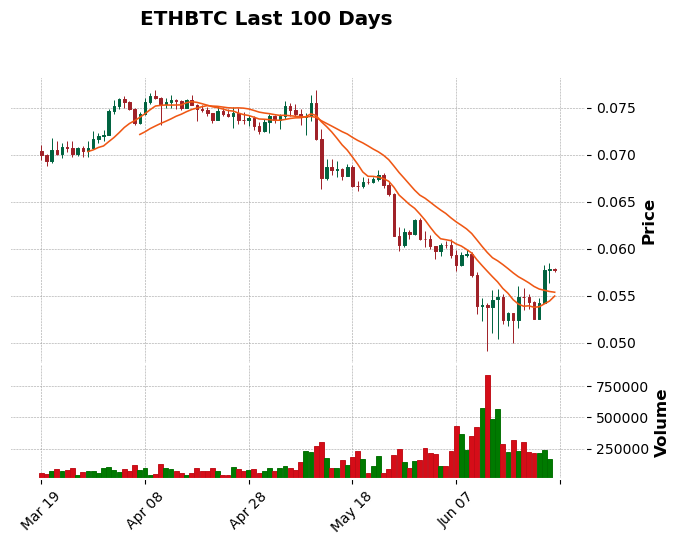

In [47]:
mpf.plot(hist_df.set_index('Close Time').tail(100), type='candle', style='charles', volume=True,
        title='ETHBTC Last 100 Days',
        mav=(10,20))